In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

    ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
        # 1. 문제정의
- 생존자 / 사망자 예측
- kaggle 대회에서 높은 점수를 획득

# 2. 데이터 수집
- kaggle 사이트로부터 train, test 수집

In [2]:
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [3]:
# PassengerId를 인덱스로 변경하기
# set_index
train = train.set_index('PassengerId')
test = test.set_index('PassengerId')

In [4]:
# 인덱스로 변경 하는 방법 중 하나
# pd.read_csv('./titanic/train.csv', index_col = 'PassengerId')

In [5]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [6]:
# 결측치 확인
train.info()
# Age, Cabin, Emabrkde

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
test.info()
# Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [8]:
# train -> embarked 결측치 채우기
# value_counts() : 컬럼에 몇 개의 값이 있는지 확인
# 각각의 개수 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# 최빈값으로 결측치 채우기
# Embarked칼럼에 S가 갖는 비율이 높음(70% 이상)
# 2개의 결측치이기 때문에 학습에 큰 영향을 끼치지 않음
# fillna('결측치에 채울 값') -> 결측치 재우기
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# train, test의 Age 채우기
# 다른 컬럼 간의 상관관계를 통해서 결측치를 채워보자
# Age과 다른 컬럼 간의 상관관계를 알아보자
# corr : 상관관계 알아보기
# 절대값이 1에 가까울 수록 두 컬럼 간의 상관관계가 높다.
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# Age - 객실등급(Pclass), 성별(Sex)을 통해 결측치를 채움
pt1 = train.pivot_table(values = 'Age', # 궁금한 값
                 index = ['Pclass', 'Sex'], # 기준값 (기준값에는 결측치가 존재하면 안된다!)
                 aggfunc = 'mean') # 출력할 값 = 평균(mean)

In [12]:
# 인덱스 두 개 입력
pt1.loc[3,'female']

Age    21.75
Name: (3, female), dtype: float64

In [13]:
# apply : 행 / 열 단위로 작업을 할 때 사용
# np.isnan : 결측치면 : Tarue, 결측치가 아니면 : False
# astype : Series의 타입 변경

In [14]:
train.iloc[0, : ]

Survived                          0
Pclass                            3
Name        Braund, Mr. Owen Harris
Sex                            male
Age                              22
SibSp                             1
Parch                             0
Ticket                    A/5 21171
Fare                           7.25
Cabin                           NaN
Embarked                          S
Name: 1, dtype: object

In [15]:
def fill_age(data):
    # 나이가 결측치인지 아닌지
    # 나이가 결측치라면 pt1 값을 가져오고
    if np.isnan(data['Age']):
        return pt1.loc[data['Pclass'], data['Sex']][0]
    # 나이가 결측치가 아니라면 그 값을 그대로 사용
    else:
        return data['Age']

In [16]:
train['Age'] = train.apply(fill_age, axis = 1).astype('int')

In [17]:
# axis = 1 행 단위로 작업하겠다.
# train에 있는 행을 하나씩 출력해서 fill_age함수에 적용

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [20]:
test['Age'] = test.apply(fill_age, axis = 1).astype('int')

In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [22]:
# test의 Fare 채우기
# 평균값
# fillna 활용
# 1. 결측치 제외하고 Fare값 출력하기
train['Fare'].mean()
# 2. 출력한 값의 평균값 출력하기
# 3. 출력한 평균값으로 결측치 채우기
test.fillna(32)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,32,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,32,S
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,32,Q
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,32,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,32,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,32,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,32,S


In [23]:
# 피벗테이블을 활용해서 Fare 결측치 채우기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [24]:
# test의 Fare 결측치 채우기
# 객실등급(Pclass), 성별(Sex)을 기준으로 사용

In [25]:
pt2 = train.pivot_table(values = 'Fare', # 궁금한 값
                 index = ['Pclass', 'Sex'], # 기준값 (기준값에는 결측치가 존재하면 안된다!)
                 aggfunc = 'mean') # 출력할 값 = 평균(mean)

In [26]:
def fill_Fare(data):
    # 나이가 결측치인지 아닌지
    # 나이가 결측치라면 pt1 값을 가져오고
    if np.isnan(data['Fare']):
        return pt1.loc[data['Pclass'], data['Sex']][0]
    # 나이가 결측치가 아니라면 그 값을 그대로 사용
    else:
        return data['Fare']

In [27]:
# Fare에 있는 결측치 행을 출력하기 위해서 불리언 인덱싱
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [28]:
test['Fare'] = test['Fare'].fillna(12.6)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


In [30]:
# train, test의 Cabin 결측치 채우기
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [31]:
# Cabin
# 층별로 구분하기

In [32]:
# train['Cabin'] 컬럼에 각 값을 인덱싱
# 인덱싱을 하기 위해선 값들이 문자열이 되어야함 -> str
# 문자열의 0번 인덱스를 가져오겠다 -> [0]
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]
# 모든 값을 층별로 구분

In [33]:
# 결측치 자체를 하나의 데이터로 활용
# 죽은 사람에겐 정보를 수집할 수 없음
# 'Cabin컬럼의 결측치가 위의 이유일 것이다'
# 라는 가설을 세우고 모든 결측치를 하나의 문자로 채움
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int32  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 80.1+ KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int32  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.3+ KB


 # 4. 탐색적 데이터 분석
 - 시각화를 통해서 칼럼을 분석

<AxesSubplot:xlabel='Cabin', ylabel='count'>

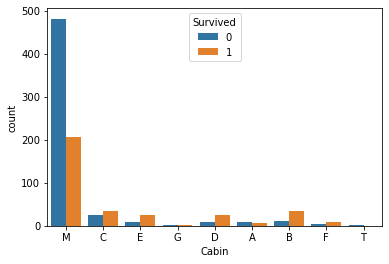

In [36]:
# Cabin
sns.countplot(data=train, # 사용할 데이터
              x='Cabin', # X축으로 사용할 컬럼
              hue='Survived') # count에 대한 기준

- M에서 상대적으로 많은 사람이 죽었다.
- 위에서 세운 가설이 어느 정도 성립
- 생존여부 판단에 활용해도 괜찮겠다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

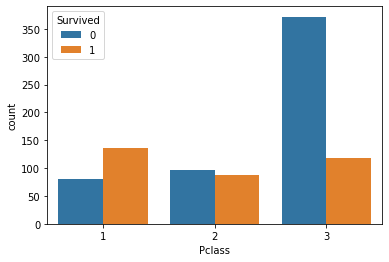

In [37]:
# Pclass
sns.countplot(data=train,
             x='Pclass',
             hue='Survived')

- 객실등급(Pclass)컬럼이 생존에 영향을 끼쳤다.
- 3등급이 생존에 많은 차이를 보인다.

<AxesSubplot:xlabel='Cabin', ylabel='count'>

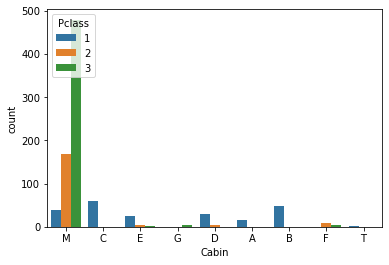

In [38]:
# Pclass Cabin 컬럼 시각화
sns.countplot(data = train,
             x = 'Cabin',
             hue = 'Pclass')

- Cabin과 Pclass간의 상관이 어느 정도 있다.
- Cabin의 M값은 유의미한 결과를 도출했다.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

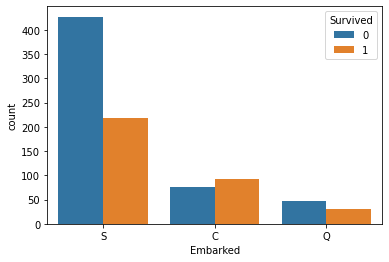

In [39]:
# Embarked
# 탑승 위치별 생존
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')

- S(사우스햄튼)에서 탑승한 탑승객들은 많은 비율로 죽었다.
- S의 경제력이 낮아서 낮은 등급의 객실을 타지 않았을까?

<AxesSubplot:xlabel='Sex', ylabel='Age'>

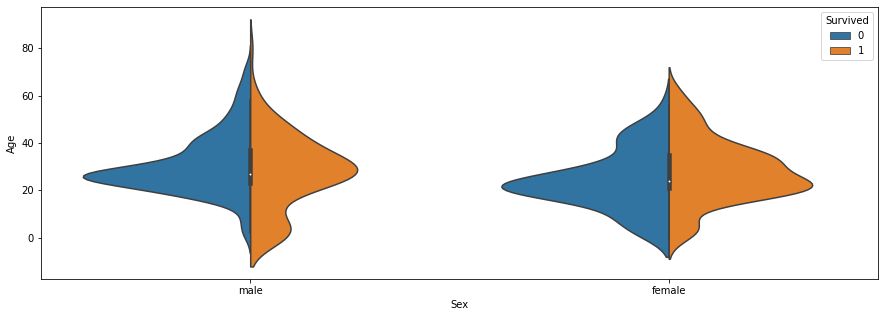

In [40]:
# Age
# violinplot
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)

- 20대 초반의 사람들이 가장 많다.
- 어린 아이 중에서는 남자아이가 산 비율이 높다.
- 남아선호사상같은 시대적 배경이 있지 않았을까?

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

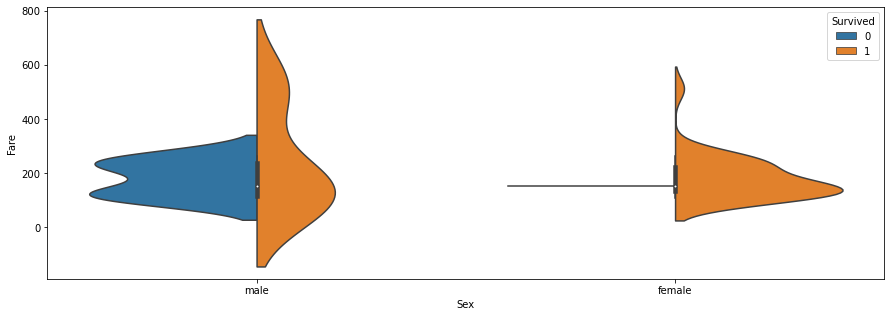

In [41]:
# Fare
plt.figure(figsize = (15,5))
sns.violinplot(data = train[train['Fare']>=100],
              x = 'Sex',
              y = 'Fare',
              hue = 'Survived',
              split = True)

- 저렴한 객실에 승선한 사람들은 상대적으로 많이 죽었다.

<AxesSubplot:xlabel='Family', ylabel='count'>

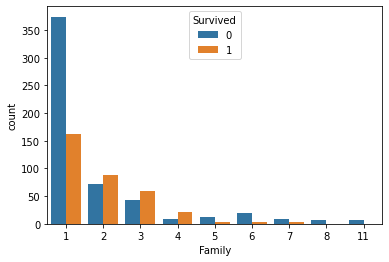

In [42]:
# Parch, SibSp - 부모자식, 헝제자매
# 가족
# Family라는 새로운 특성을 생성
# 같이 승선한 가족의 수
# Family = Parch + SibSp + 1(본인)
# countplot
train['Family'] = train['Parch'] + train['SibSp'] + 1
test['Family'] = test['Parch'] + test['SibSp'] + 1
sns.countplot(data = train,
             x = 'Family',
             hue = 'Survived')

In [43]:
# Family를 범주형으로 만들자
# 1 : Alone
# 2 ~ 4 : Small
# 5 이상이면 : Large
# pd.cut
bins = [0 , 1 , 4 , 11] # 범주형의 범위 지정 위 그래프의 (1 ~ 11)
labels = ['Alone', 'Small', 'Large'] # 범주형에 달아줄 이름
train['Family'] = pd.cut(train['Family'], bins = bins, labels = labels)

In [44]:
test['Family'] = pd.cut(test['Family'], bins = bins, labels = labels)

In [45]:
train['Family'].value_counts()

Alone    537
Small    292
Large     62
Name: Family, dtype: int64

<AxesSubplot:xlabel='Family', ylabel='count'>

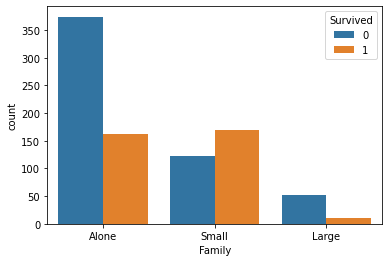

In [46]:
sns.countplot(data = train,
             x = 'Family',
             hue = 'Survived')

In [47]:
# 글자열 데이터 다루기
# name
# 중간 호칭만 추출
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [48]:
# apply
# split
temp = train['Name'].iloc[0]

In [49]:
temp.split(',') # 쉼표를 기준으로 앞과 뒤로 데이터를 나눔

['Braund', ' Mr. Owen Harris']

In [50]:
 temp.split(',')[1] # 원하는 중간호칭은 무조건 1번 인덱스에 위치

' Mr. Owen Harris'

In [51]:
temp.split(',')[1].split('.') # 맞춤표를 기준으로 앞과 뒤로 데이터를 나눔

[' Mr', ' Owen Harris']

In [52]:
temp.split(',')[1].split('.')[0] # 원하는 중간호칭은 0번 인덱스에 위치

' Mr'

In [53]:
temp.split(',')[1].split('.')[0].strip() # 공백 제거

'Mr'

In [54]:
def split_name(data) :
    return data.split(',')[1].split('.')[0].strip()

In [55]:
# apply(axis = 1)
# axis = 1 행 단위로 작업
# axis = 0 열 단위로 작업(기본값)
train['Name'] = train['Name'].apply(split_name)
test['Name'] = test['Name'].apply(split_name)

In [56]:
train['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Jonkheer          1
Mme               1
Sir               1
Capt              1
Lady              1
Don               1
the Countess      1
Name: Name, dtype: int64

In [57]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [58]:
# 컬럼 지우기
# train = train.drop("지울 컬럼 이름", axis = 1)

In [59]:
Title_Dictionary = {
    "Capt": "Other",
    "Col": "Other",
    "Major": "Other",
    "Jonkheer": "Other",
    "Don": "Other",
    "Sir" : "Other",
    "Dr": "Dr",
    "Rev": "Rev",
    "the Countess":"Other",
    "Mme": "Other",
    "Mlle": "Other",
    "Ms": "Other",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Other"
}

In [60]:
# map 함수를 활용해서 라벨인코딩
train['Name'] = train['Name'].map(Title_Dictionary)
test['Name'] = test['Name'].map(Title_Dictionary)

<AxesSubplot:xlabel='Name', ylabel='count'>

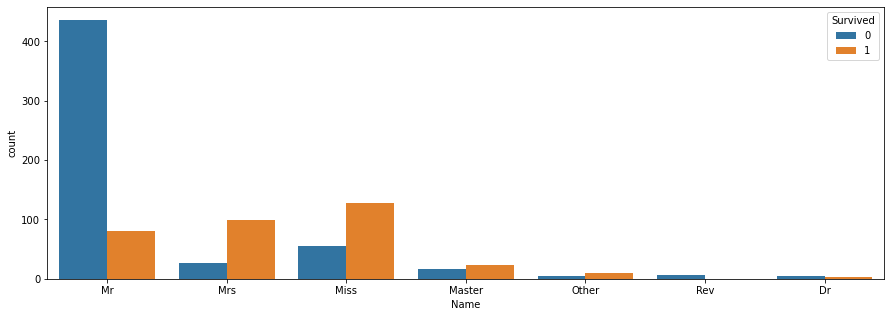

In [61]:
plt.figure(figsize = (15, 5))
sns.countplot(data = train,
             x = 'Name',
             hue = 'Survived')

In [62]:
train['Ticket']

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [63]:
# Ticket 삭제
# 유의미한 결과를 출력하기 힘들 것이라고 판단해서!
train.drop('Ticket', axis = 1, inplace = True)
test.drop('Ticket', axis = 1, inplace = True)

In [64]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [65]:
# one-hot 인코딩
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    object  
 9   Embarked  891 non-null    object  
 10  Family    891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(4), object(4)
memory usage: 114.1+ KB


In [66]:
onehot_column = ['Name', 'Sex', 'Cabin', 'Embarked', 'Family']

In [67]:
# prefix : 원핫인코딩 후 어디서 파생된 컬럼인지 확인
pd.get_dummies(train['Name'], prefix = 'Name')

,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Other,Name_Rev
PassengerId,,,,,,,
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
887,0,0,0,0,0,0,1
888,0,0,1,0,0,0,0
889,0,0,1,0,0,0,0


In [68]:
for col in onehot_column :
    # 원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(train[col], prefix = col)
    # 원핫 인코딩된 결과물을 기존의 자료와 합치기
    train = pd.concat([train, dummy], axis = 1)
    # 글자형 컬럼(원핫 인코딩 진행한) 삭제
    train.drop(col, axis = 1, inplace = True)

In [69]:
for col in onehot_column :
    # 원핫 인코딩한 컬럼 변수에 저장
    dummy = pd.get_dummies(test[col], prefix = col)
    # 원핫 인코딩된 결과물을 기존의 자료와 합치기
    test = pd.concat([test, dummy], axis = 1)
    # 글자형 컬럼(원핫 인코딩 진행한) 삭제
    test.drop(col, axis = 1, inplace = True)

In [70]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 28)


In [71]:
# test가 가지고 있는 컬럼 - train이 가지고 있는 컬럼
# test에는 있고 train에는 없는 것
set(test.columns) - set(train.columns)

set()

In [72]:
# train가 가지고 있는 컬럼 - test이 가지고 있는 컬럼
# train에는 있고 test에는 없는 것
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [73]:
# 기존 test에 Cabin컬럼에 T라는 값이 없기 때문에
# 원핫인코딩을 진행했을 때 Cabin_T컬럼이 생성되지 않았다.
# Cabin_T컬럼에는 모두 0의 값을 집어 넣어줌
test['Cabin_T'] = 0

In [74]:
print(train.shape)
print(test.shape)

(891, 30)
(418, 29)


# 5. 모델 선택 및 하이퍼 파라미터 튜닝

In [75]:
# 훈련 / 평가 데이터를 -> train, test
# 문제와 정답으로 분리 -> X, y
# X_train, y_train, X_test
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test.copy()

In [76]:
X_train.shape, X_test.shape, y_train.shape

((891, 29), (418, 29), (891,))

In [77]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 4)

In [78]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [79]:
result = cross_val_score(tree, X_train, y_train, cv = 5)
result.mean()

0.8204067541271736

# 6. 학습

In [80]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

# 7. 평가

In [81]:
tree.score(X_train, y_train)

0.8439955106621774

In [82]:
# X_test를 통해서 예측값 출력하기
pre = tree.predict(X_test)

In [83]:
result = pd.read_csv('titanic/gender_submission.csv')

In [84]:
# result에 survived컬럼을 예측한 값으로 채우자
result['Survived'] = pre

In [85]:
# result를 csv파일로 저장
result.to_csv('DT_submission_01.csv', index = False)

# 5-1
- RandomForest

In [86]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, # tree의 개수
                                      max_features=0.7, # 각각의 트리에서 사용할 특성의 개수
                                      max_depth=5,
                                      min_samples_leaf=15,
                                      max_leaf_nodes=50)

In [87]:
# GridSearch
# 여러 개의 파라미터를 한 번에 튜닝하는 방법
# 교차검증을 같이 진행
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid={
    'max_depth' : [5,10,15,20],
    'n_estimators' :[1000,1500,2000,2500],
    'max_features' : [0.5, 0.7],
    'max_leaf_nodes' : [20,50,80],
    'min_samples_leaf' : [10,15,20]
}

In [109]:
grid = GridSearchCV(forest, # gridSearch에 사용할 모델
                   param_grid, # 튜닝할 매개변수
                   cv = 3, # k겹 교차검증
                   verbose = 2 # 현재 진행중인 학습 열람
                   )

In [110]:
# 4 * 4 * 2 * 3 * 3 = 288번의 학습 중에 제일 잘 나온걸 찾는 중
grid.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000, total=   1.1s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000, total=   1.1s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500, total=   1.7s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500, total=   1.7s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=20, min_samples_lea

[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500, total=   1.7s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000, total=   2.3s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000, total=   2.2s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2000, total=   2.3s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500, total=   2.8s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=50, min_samples_lea

[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500, total=   2.8s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500, total=   2.8s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500, total=   2.9s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000, total=   1.1s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000, total=   1.1s
[CV] max_depth=5, max_features=0.5, max_leaf_nodes=80, min_samples_lea

[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=20, min_samples_lea

[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500, total=   1.8s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2000, total=   2.4s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=2500, total=   2.9s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=50, min_samples_lea

[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500, total=   3.0s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500, total=   2.9s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500, total=   3.0s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=1000, total=   1.1s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=1000, total=   1.2s
[CV] max_depth=5, max_features=0.7, max_leaf_nodes=80, min_samples_lea

[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000, total=   1.1s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000, total=   1.1s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500, total=   1.7s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500, total=   1.7s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1500, total=   1.7s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=20, min_s

[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500, total=   1.7s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000, total=   2.2s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000, total=   2.2s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2000, total=   2.2s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=2500, total=   2.7s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=50, min_s

[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500, total=   2.8s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500, total=   2.8s
[CV] max_depth=10, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=10, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500, total=   2.8s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1000, total=   1.3s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=20, min_s

[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000, total=   1.3s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000, total=   1.3s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=50, min_s

[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500, total=   1.9s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=10, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=2500, total=   3.1s
[CV] max_depth=10, max_features=0.7, max_leaf_nodes=80, min_s

[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500, total=   2.9s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500, total=   2.9s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500, total=   2.9s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=1000, total=   1.1s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=20, min_s

[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000, total=   1.1s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500, total=   1.7s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500, total=   1.7s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1500, total=   1.7s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=50, min_s

[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500, total=   1.7s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000, total=   2.3s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000, total=   2.3s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2000, total=   2.3s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=15, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=2500, total=   2.8s
[CV] max_depth=15, max_features=0.5, max_leaf_nodes=80, min_s

[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2500, total=   3.0s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2500, total=   3.0s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=15, n_estimators=2500, total=   3.2s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=20, min_s

[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1000, total=   1.2s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500, total=   1.7s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500, total=   1.8s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=20, n_estimators=1500, total=   1.8s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=50, min_s

[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=1500, total=   1.8s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000, total=   2.3s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000, total=   2.4s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2000, total=   2.4s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=15, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=20, n_estimators=2500, total=   2.9s
[CV] max_depth=15, max_features=0.7, max_leaf_nodes=80, min_s

[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=2500, total=   2.8s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=2500, total=   2.8s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=2500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=20, min_samples_leaf=20, n_estimators=2500, total=   2.9s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=50, min_s

[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1000 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500, total=   1.7s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500, total=   1.8s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500 
[CV]  max_depth=20, max_features=0.5, max_leaf_nodes=80, min_samples_leaf=10, n_estimators=1500, total=   1.8s
[CV] max_depth=20, max_features=0.5, max_leaf_nodes=80, min_s

[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=1500, total=   1.9s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2000, total=   2.5s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=20, min_samples_leaf=10, n_estimators=2500, total=   3.1s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=20, min_s

[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500, total=   3.1s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500, total=   3.1s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=10, n_estimators=2500, total=   3.2s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=50, min_samples_leaf=15, n_estimators=1000, total=   1.2s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=50, min_s

[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000, total=   1.4s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1000, total=   1.3s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500, total=   1.9s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500, total=   1.9s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500 
[CV]  max_depth=20, max_features=0.7, max_leaf_nodes=80, min_samples_leaf=15, n_estimators=1500, total=   1.8s
[CV] max_depth=20, max_features=0.7, max_leaf_nodes=80, min_s

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed: 29.6min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.7,
                                              max_leaf_nodes=50,
                                              min_samples_leaf=15,
                                              n_estimators=1000),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'max_leaf_nodes': [20, 50, 80],
                         'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [1000, 1500, 2000, 2500]},
             verbose=2)

In [112]:
# 최적의 파라미터
print('최적의 파라미터 : ',grid.best_params_)
# 최적의 예측점수
print('최고 예측 점수 : ',grid.best_score_)

최적의 파라미터 :  {'max_depth': 10, 'max_features': 0.5, 'max_leaf_nodes': 50, 'min_samples_leaf': 10, 'n_estimators': 1000}
최고 예측 점수 :  0.8294051627384961


# 6-1

In [94]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.7, max_leaf_nodes=50,
                       min_samples_leaf=15, n_estimators=1000)

# 7-1

In [95]:
pre = forest.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('forest_submission_01.csv', index = False)

# 5-2
- KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [113]:
# 스케일러 적용전
result = cross_val_score(knn, X_train, y_train, cv =5)
result.mean()

0.7216935534492499

In [114]:
# standardScaler 받아오기
from sklearn.preprocessing import StandardScaler

In [115]:
scaler = StandardScaler()

In [116]:
# 범위 학습
scaler.fit(X_train)

StandardScaler()

In [120]:
# 학습된 범위로 값 반환
trans_X_train = scaler.transform(X_train)
trans_X_test = scaler.transform(X_test)

In [122]:
result = cross_val_score(knn, trans_X_train, y_train, cv = 5)
result.mean()

0.8046889711882492

# 6-2

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

# 7-2

In [98]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

#  5-3
- voting

In [99]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(
    estimators = [
        ('knn_model', knn),
        ('tree_model', tree),
        ('forest_model', forest)
    ],
    voting = 'soft'
)

# 6-3

In [100]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn_model', KNeighborsClassifier()),
                             ('tree_model',
                              DecisionTreeClassifier(max_depth=4)),
                             ('forest_model',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=0.7,
                                                     max_leaf_nodes=50,
                                                     min_samples_leaf=15,
                                                     n_estimators=1000))],
                 voting='soft')

In [101]:
pre = voting.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('voting_submission_01.csv', index = False)

# 5-4
- adaboost

In [102]:
from sklearn.ensemble  import AdaBoostClassifier

In [103]:
adaboost = AdaBoostClassifier()

# 6-4

In [104]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

# 7-4

In [105]:
pre = adaboost.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('adaboost_submission_01.csv', index = False)

# 5-5
- GradientBoosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()

# 6-5

In [107]:
gdc.fit(X_train, y_train)

GradientBoostingClassifier()

# 7-5

In [108]:
pre = gdc.predict(X_test)
result = pd.read_csv('titanic/gender_submission.csv')
result['Survived'] = pre
result.to_csv('gdc_submission_01.csv', index = False)